<a href="https://colab.research.google.com/github/pymoux/wildfires_DST/blob/main/1st_exploration/explo_viz-XLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## import libraries and data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DST_Wildfires/db_output/wildfires15_db.csv', sep=',')
df.head()


<ipython-input-3-0a168edb337f>:1: DtypeWarning: Columns (13,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/DST_Wildfires/db_output/wildfires15_db.csv', sep=',')


,Unnamed: 0,FOD_ID,FPA_ID,FIRE_YEAR,DISCO_DATE,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,FIRE_DURATION,...,COUNTY,FIPS_CODE,FIPS_NAME,GEOID,STATEFP,COUNTYFP,COUNTYNAME,STUSPS,STATENAME,GACC_area
0,0,1,FS-1418826,2005,2005-02-02,9.0,Miscellaneous,0.10,A,0.0,...,63.0,63.0,Plumas,6063.0,6.0,63.0,Plumas,CA,California,Northern California
1,1,2,FS-1418827,2004,2004-05-12,1.0,Lightning,0.25,A,0.0,...,61.0,61.0,Placer,6017.0,6.0,17.0,El Dorado,CA,California,Northern California
2,2,3,FS-1418835,2004,2004-05-31,5.0,Debris Burning,0.10,A,0.0,...,17.0,17.0,El Dorado,6017.0,6.0,17.0,El Dorado,CA,California,Northern California
3,3,4,FS-1418845,2004,2004-06-28,1.0,Lightning,0.10,A,5.0,...,3.0,3.0,Alpine,6003.0,6.0,3.0,Alpine,CA,California,Northern California
4,4,5,FS-1418847,2004,2004-06-28,1.0,Lightning,0.10,A,5.0,...,3.0,3.0,Alpine,6003.0,6.0,3.0,Alpine,CA,California,Northern California


In [ ]:
df.iloc[0]

Unnamed: 0                            0
FOD_ID                                1
FPA_ID                       FS-1418826
FIRE_YEAR                          2005
DISCO_DATE                   2005-02-02
STAT_CAUSE_CODE                     9.0
STAT_CAUSE_DESCR          Miscellaneous
FIRE_SIZE                           0.1
FIRE_SIZE_CLASS                       A
FIRE_DURATION                       0.0
LATITUDE                      40.036944
LONGITUDE                   -121.005833
STATE                                CA
COUNTY                             63.0
FIPS_CODE                          63.0
FIPS_NAME                        Plumas
GEOID                            6063.0
STATEFP                             6.0
COUNTYFP                           63.0
COUNTYNAME                       Plumas
STUSPS                               CA
STATENAME                    California
GACC_area           Northern California
Name: 0, dtype: object

## surface cumulée par an

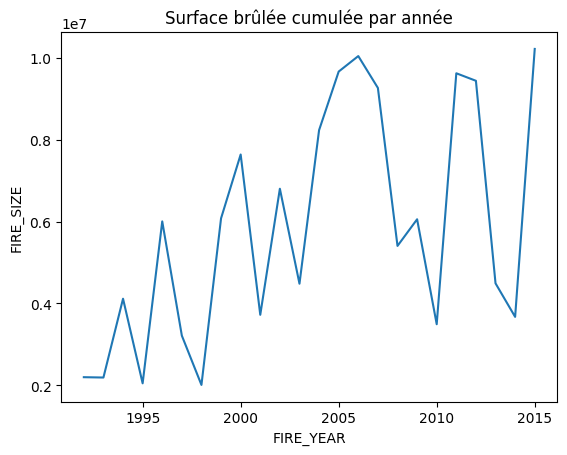

In [ ]:
df_surf_year = df.groupby(by='FIRE_YEAR', as_index=False).agg({'FIRE_SIZE':'sum'})

sns.lineplot(data=df_surf_year, x='FIRE_YEAR', y='FIRE_SIZE')
plt.title('Surface brûlée cumulée par année');

#df_surf_year


## surface brûlée par an et par état

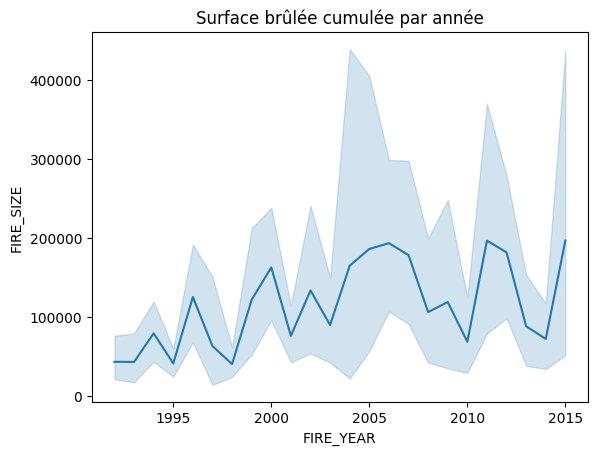

In [ ]:
df_surf_year_state = df.groupby(by=['FIRE_YEAR', 'STUSPS'], as_index=False).agg({'FIRE_SIZE':'sum'})

#sns.relplot(data=df_surf_year_state, x='FIRE_YEAR', y='FIRE_SIZE', kind='line')
sns.lineplot(data=df_surf_year_state, x='FIRE_YEAR', y='FIRE_SIZE')
plt.title('Surface brûlée cumulée par année');

## distribution par classe de feu

[666919, 939376, 220077, 28427, 14107, 7786, 3773]

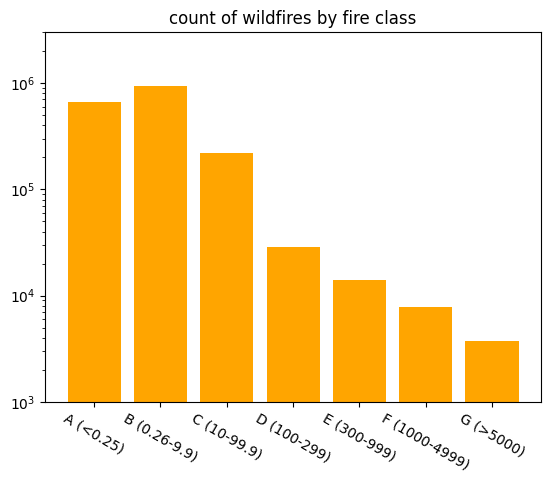

In [ ]:
x = range(len(df['FIRE_SIZE_CLASS'].unique()))
h = df['FIRE_SIZE_CLASS'].value_counts(sort=False).sort_index().to_list()
xlabels = ['A (<0.25)', 'B (0.26-9.9)', 'C (10-99.9)', 'D (100-299)', 'E (300-999)', 'F (1000-4999)', 'G (>5000)']

plt.bar(x, h, color='orange')
plt.title('count of wildfires by fire class')
plt.xticks(x, xlabels, rotation=-30)
plt.ylim(1000, 3000000)
plt.yscale('log')

h


[1826372, 28427, 25666]

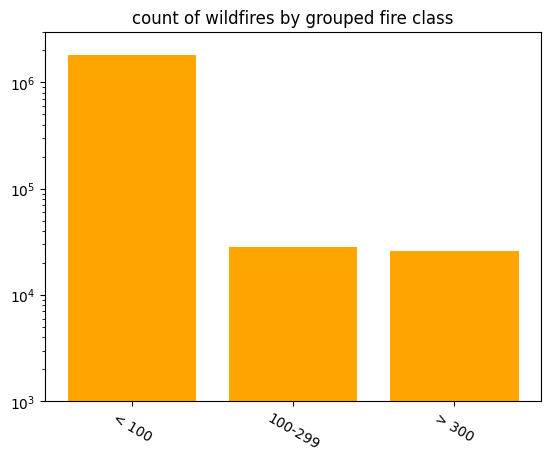

In [ ]:
def grouping_class(fclass):
  if fclass in ['A', 'B', 'C']:
    return 'ABC'
  elif fclass in ['D']:
    return 'D'
  elif fclass in ['E', 'F', 'G']:
    return 'EFG'

df['GROUPED_CLASS'] = df['FIRE_SIZE_CLASS'].apply(lambda x: grouping_class(x))

x = range(len(df['GROUPED_CLASS'].unique()))
h = df['GROUPED_CLASS'].value_counts(sort=False).sort_index().to_list()
xlabels = ['< 100', '100-299', '> 300']

plt.bar(x, h, color='orange')
plt.title('count of wildfires by grouped fire class')
plt.ylim(1000, 3000000)
plt.xticks(x, xlabels, rotation=-30)
plt.yscale('log')

h


,GROUPED_CLASS,FIRE_SIZE
0,ABC,8.375287e+06
1,D,4.599518e+06
2,EFG,1.271577e+08


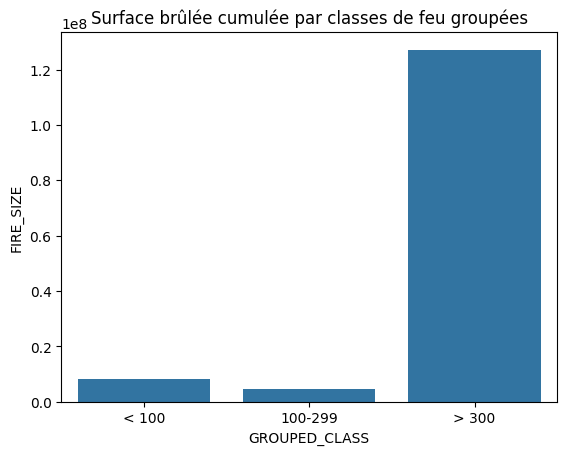

In [ ]:
df_surf_class = df.groupby(by='GROUPED_CLASS', as_index=False).agg({'FIRE_SIZE':'sum'})

sns.barplot(data=df_surf_class, x='GROUPED_CLASS', y='FIRE_SIZE')
plt.title('Surface brûlée cumulée par classes de feu groupées')
plt.xticks(df_surf_class['GROUPED_CLASS'].values, ['< 100', '100-299', '> 300']);

df_surf_class


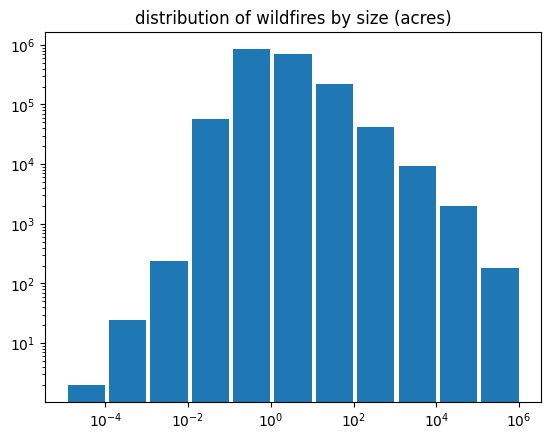

In [ ]:
bins = 10**(np.arange(-5,7, dtype='float'))
plt.hist(df['FIRE_SIZE'], bins=bins, rwidth=.95)
plt.title('distribution of wildfires by size (acres)')
plt.xscale('log')
plt.yscale('log')
